In [135]:
!pip install tqdm



# Model Evaluation

<p>In this session, the task it to practice various methods for evaluating a machine learning model.<p/>

The car prices data of last week was used. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv)

## Import Libraries

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

## Load Data

In [144]:
df = pd.read_csv('data.csv')

In [145]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Clean Data

In [146]:
df = df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 
         'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']]

In [147]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [148]:
df = df.fillna(0)

In [149]:
df['above_average'] = (df['msrp'] > df['msrp'].mean()).astype(int)

In [150]:
del df['msrp']

In [151]:
temp, test_df = train_test_split(df, train_size=0.8, random_state=1)
train_df, val_df = train_test_split(temp, train_size=0.75, random_state=1)
train_df.shape, val_df.shape, test_df.shape

((7148, 10), (2383, 10), (2383, 10))

In [152]:
train_label = train_df.above_average
val_label = val_df.above_average
test_label = test_df.above_average

del train_df['above_average']
del val_df['above_average']
del test_df['above_average']

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   above_average      11914 non-null  int32  
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 884.4+ KB


### Question 1

In [154]:
print(
    roc_auc_score(df['above_average'],df['engine_hp']),
    roc_auc_score(df['above_average'],df['engine_cylinders']),
    roc_auc_score(df['above_average'],-df['highway_mpg']),
    roc_auc_score(df['above_average'],-df['city_mpg'])
)


0.9157738865600598 0.765740332665676 0.6307493974364577 0.6706787971410986


In [155]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
above_average        0
dtype: int64

In [173]:
train_dict = train_df.to_dict(orient='record')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

val_dict = val_df.to_dict(orient='record')
X_val = dv.transform(val_dict)
test_dict = test_df.to_dict(orient='record')
X_test = dv.transform(test_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, train_label)
y_pred = model.predict(X_val)

print(round(roc_auc_score(val_label,y_pred),3))
print(round(f1_score(val_label, y_pred),3))

C:\Users\emman\AppData\Local\Temp\ipykernel_10260\1504139297.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict = train_df.to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_10260\1504139297.py:5: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dict = val_df.to_dict(orient='record')
C:\Users\emman\AppData\Local\Temp\ipykernel_10260\1504139297.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  test_dict = test_df.to_dict(orient='record')


0.92
0.887


In [158]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (val_label == 1)
    actual_negative = (val_label == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [159]:
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [160]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

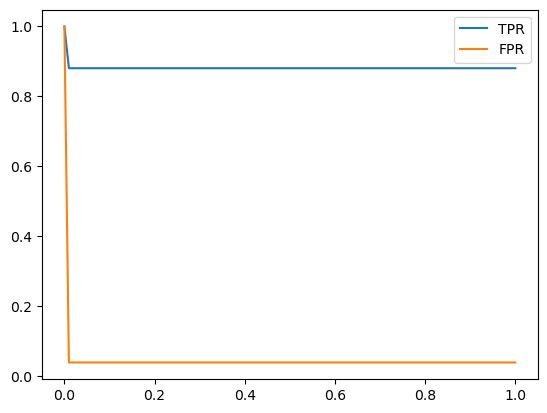

In [161]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

In [162]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [163]:
dv, model = train(train_df, train_label)

c:\Users\emman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [165]:
y_pred = predict(val_df, dv, model)

In [166]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm



In [168]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(temp):
        df_train = temp.iloc[train_idx]
        df_val = temp.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.962 +- 0.003
C=0.01 0.997 +- 0.001
C=0.1 1.000 +- 0.000
C=0.5 1.000 +- 0.000
C=1 1.000 +- 0.000
C=5 1.000 +- 0.000
C=10 1.000 +- 0.000


In [169]:
scores

[1.0, 0.9999999999999999, 1.0, 1.0, 1.0]

In [170]:
dv, model = train(temp, temp.above_average.values, C=1.0)
y_pred = predict(test_df, dv, model)

auc = roc_auc_score(test_label, y_pred)
auc

0.965348959275065

ValueError: Classification metrics can't handle a mix of binary and continuous targets

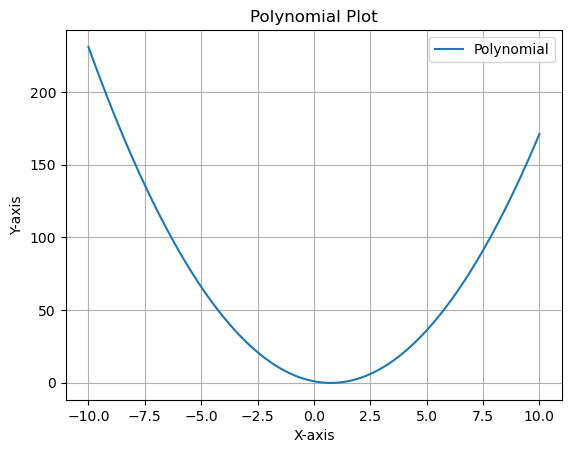

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients of the quadratic polynomial: y = 2x^2 - 3x + 1
coefficients = [2, -3, 1]

# Generate x-values
x = np.linspace(-10, 10, 100)

# Calculate y-values for the polynomial
y = np.polyval(coefficients, x)

# Plot the polynomial
plt.plot(x, y, label="Polynomial")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Polynomial Plot")
plt.legend()
plt.grid(True)
plt.show()

In [185]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm


n_splits = 5

w0 = []
w1 = []
w2 = []
w3 = []
w4 = []
err_r = []

for alpha in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    w_sum = np.zeros(5)
    w_avg = 0
    errors = []

    for train_idx, val_idx in kfold.split(hw1xtr_new):
        df_train = hw1xtr_new.iloc[train_idx]
        df_val = hw1xtr_new.iloc[val_idx]

        y_train = hw1ytr.iloc[train_idx]
        y_val = hw1ytr.iloc[val_idx]

        w = train_linear_regression_reg(X, y, r=alpha)
        y_pred = df_val.dot(w)
        err = np.mean((y_val - pred)**2)
        w_sum += w
        errors.append(err)
    
    w_avg = w_sum/5
    w0.append(w_avg[0])
    w1.append(w_avg[1])
    w2.append(w_avg[2])
    w3.append(w_avg[3])
    w4.append(w_avg[4])

    err_avg = np.mean(errors)
    err_r.append(err_avg)



IndentationError: unexpected indent (2736421524.py, line 41)

In [182]:
a = np.zeros(5) + 1
b = np.zeros(5)

In [184]:
a+b

array([1., 1., 1., 1., 1.])